In [ ]:
!pip install nltk scikit-learn pandas streamlit


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
fake_df = pd.read_csv("/content/Fake.csv")
real_df = pd.read_csv("/content/True.csv")


In [ ]:
import pandas as pd

# Load the uploaded files
fake_df = pd.read_csv("/content/Fake.csv")
real_df = pd.read_csv("/content/True.csv")


In [ ]:
# Add labels
fake_df['label'] = 0  # Fake
real_df['label'] = 1  # Real

# Combine and shuffle
data = pd.concat([fake_df, real_df])
data = data.sample(frac=1).reset_index(drop=True)

# Combine title and text into one feature
data['content'] = data['title'] + " " + data['text']
data = data[['content', 'label']]


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return ' '.join([word for word in text.split() if word not in stop_words])

data['content'] = data['content'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Check for nulls
print(data.isnull().sum())

# Drop rows with nulls (if any)
data.dropna(inplace=True)

# Confirm clean data
print(f"\nData shape after cleaning: {data.shape}")


content    0
label      0
dtype: int64

Data shape after cleaning: (44898, 2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = data['content']
y = data['label']

vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4695
           1       0.99      0.99      0.99      4285

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



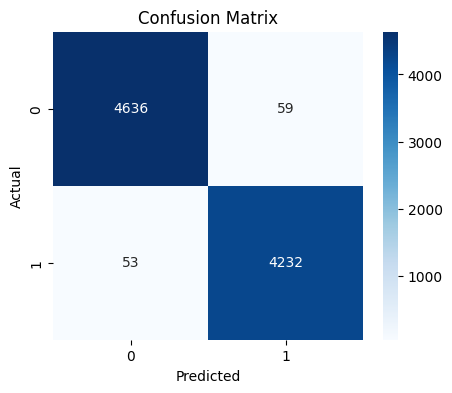

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save model and vectorizer as .pkl files
joblib.dump(model, 'news_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
print(type(model))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'news_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']